In [2]:
from src.preprocess import load_and_merge_data

df = load_and_merge_data()
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False


In [3]:
print('Rows: ', len(df))
print('Unique Stores: ', df['Store'].nunique())
print('Unique Departments: ', df['Dept'].nunique())
print('Date Range: ', df['Date'].min(), ' to ', df['Date'].max())

Rows:  421570
Unique Stores:  45
Unique Departments:  81
Date Range:  2010-02-05 00:00:00  to  2012-10-26 00:00:00


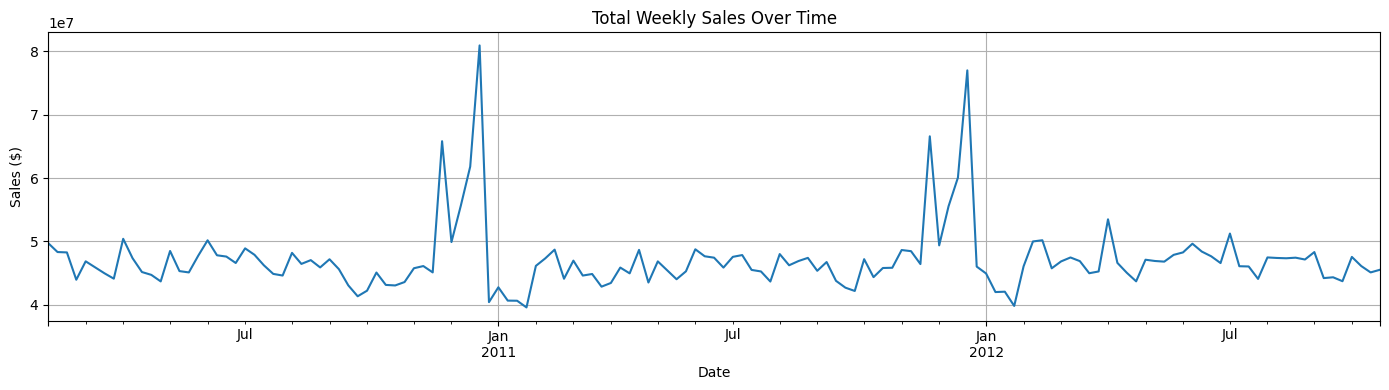

In [4]:
# Sales Over Time
import matplotlib.pyplot as plt

weekly_sales = df.groupby('Date')['Weekly_Sales'].sum()

plt.figure(figsize=(14, 4))
weekly_sales.plot()
plt.title('Total Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

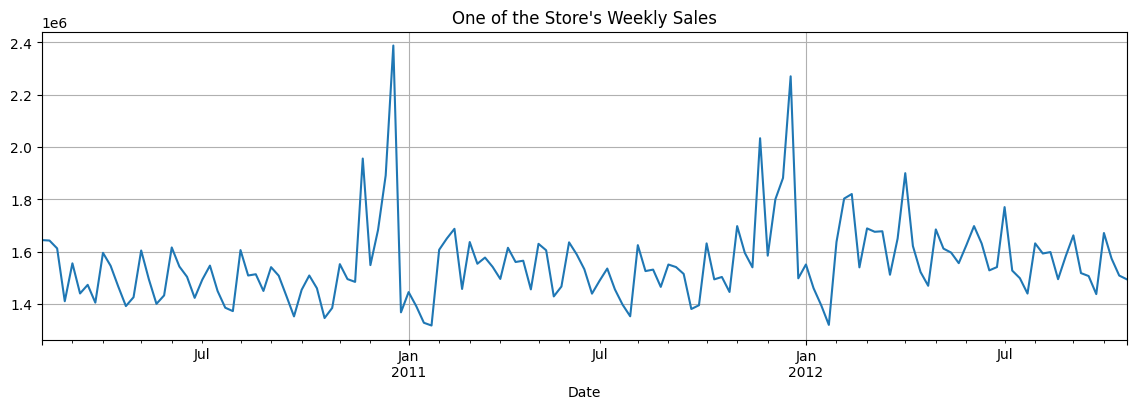

In [5]:
# One Store's Sales

store1 = df[df['Store'] == 1].groupby('Date')['Weekly_Sales'].sum()

plt.figure(figsize=(14, 4))
store1.plot()
plt.title('One of the Store\'s Weekly Sales')
plt.grid(True)
plt.show()

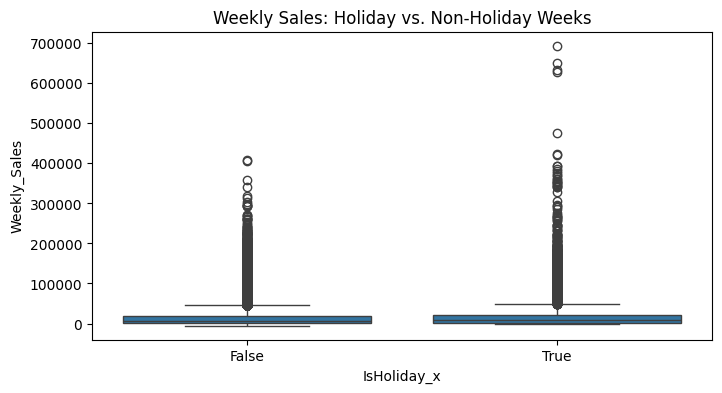

In [6]:
# Holiday Effects
import seaborn as sns

df['Year'] = df['Date'].dt.year
df['Week'] = df['Date'].dt.isocalendar().week

# Boxplot: Weekly sales on holiday vs non-holiday weeks
plt.figure(figsize=(8, 4))
sns.boxplot(x='IsHoliday_x', y='Weekly_Sales', data=df)
plt.title('Weekly Sales: Holiday vs. Non-Holiday Weeks')
plt.show()

In [7]:
from src.preprocess import add_features

df = add_features(df)
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,...,Month,DayOfWeek,IsWeekend,Lag_1,Lag_4,Rolling_Mean_4,Rolling_Std_4,StoreType_A,StoreType_B,StoreType_C
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,0.0,...,2,4,0,0.00,0.0,0.00,0.000000,True,False,False
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,0.0,...,2,4,0,24924.50,0.0,0.00,0.000000,True,False,False
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,0.0,...,2,4,0,46039.49,0.0,0.00,0.000000,True,False,False
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,0.0,...,2,4,0,41595.55,0.0,0.00,0.000000,True,False,False
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,0.0,...,3,4,0,19403.54,24924.5,32990.77,12832.106391,True,False,False


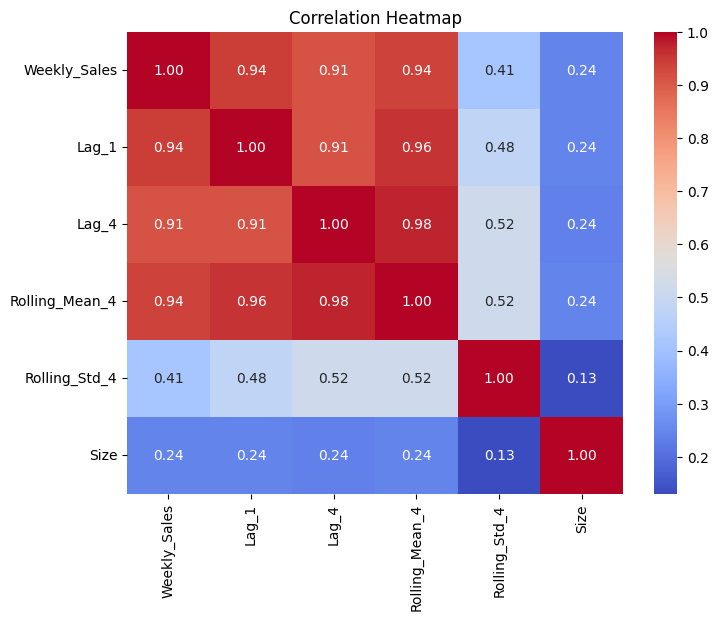

In [8]:
# Visualizing Feature Impacts

# Correlation
numeric_cols = ['Weekly_Sales', 'Lag_1', 'Lag_4', 'Rolling_Mean_4', 'Rolling_Std_4', 'Size']

corr = df[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

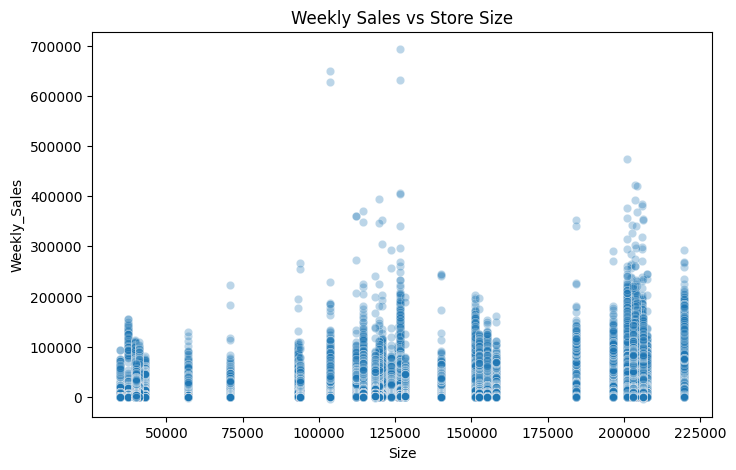

In [9]:
# Sales vs Store Size
plt.figure(figsize=(8,5))
sns.scatterplot(x='Size', y='Weekly_Sales', data=df, alpha=.3)
plt.title('Weekly Sales vs Store Size')
plt.show()

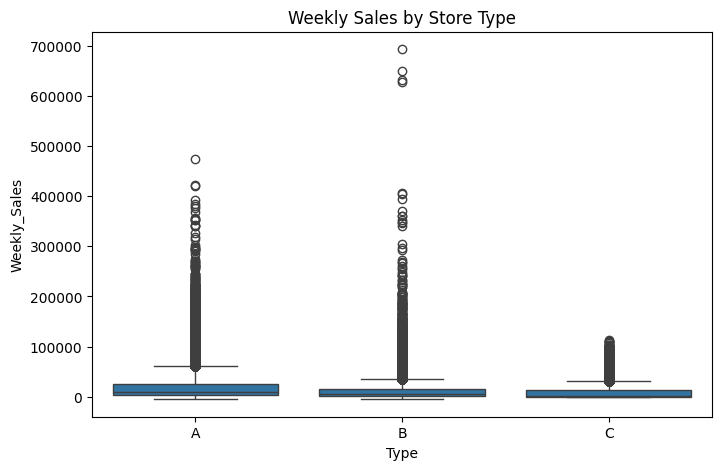

In [11]:
# Sales by Store Type
plt.figure(figsize=(8,5))
sns.boxplot(x="Type", y="Weekly_Sales", data=df)
plt.title("Weekly Sales by Store Type")
plt.show()

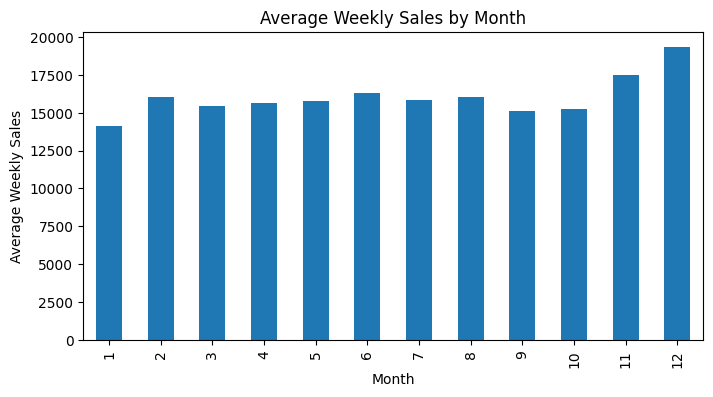

In [12]:
# Sales by Month
monthly_sales = df.groupby('Month')['Weekly_Sales'].mean()

plt.figure(figsize=(8, 4))
monthly_sales.plot(kind='bar')
plt.title('Average Weekly Sales by Month')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales')
plt.show()